In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Prepo 1 (Visualisasi)
import missingno as mno
from fast_ml.feature_selection import get_duplicate_features

# Prepo 2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import FunctionTransformer

# Model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Score
from sklearn.metrics import accuracy_score, make_scorer


In [2]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# !pip uninstall catboost
# !pip install catboost


# Input data
---

In [3]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [5]:
feature

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [4]:
label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [4]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# Prepocessing
___

## Cek Missing Value

In [9]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(train):
        # Total missing values
        mis_val = train.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

Your selected dataframe has 19 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Type_Occupation,488,31.5
Annual_income,23,1.5
Birthday_count,22,1.4
GENDER,7,0.5


<Axes: >

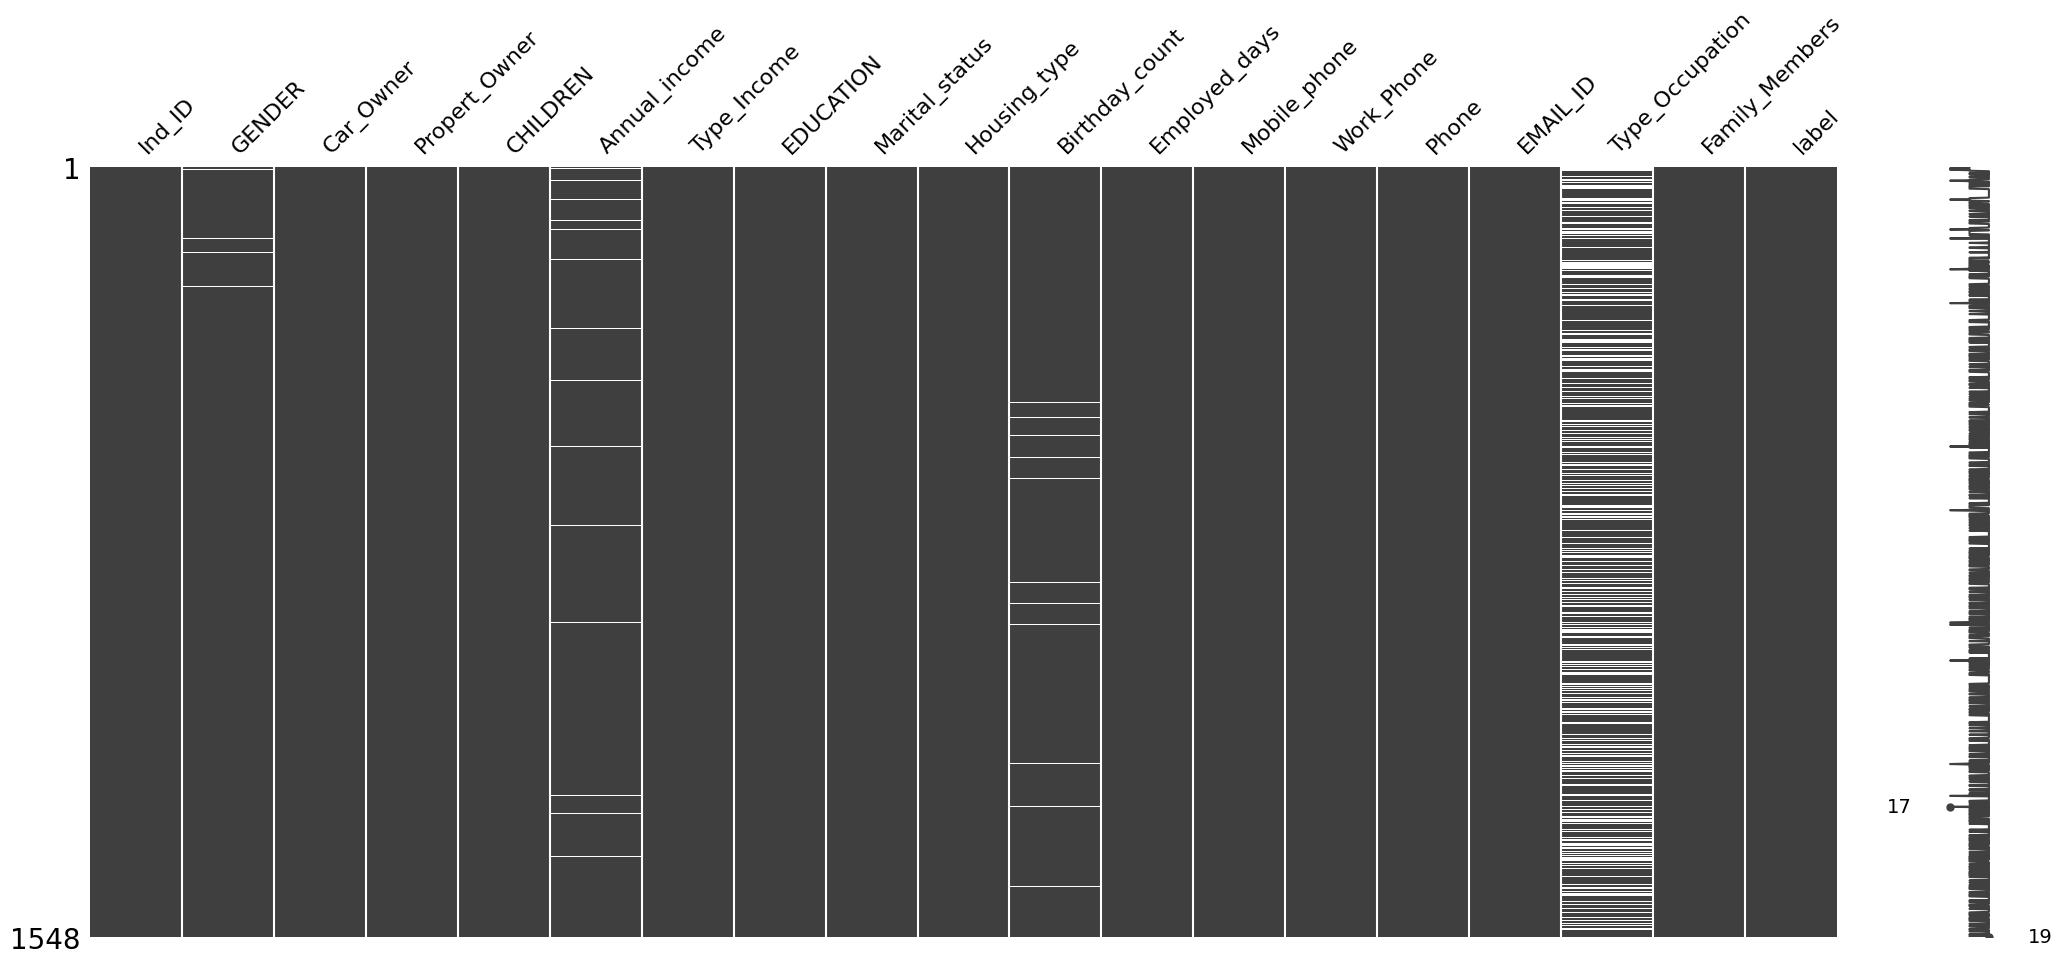

In [11]:
mno.matrix(data)

In [12]:
# Cek apakah ada row data duplikat
data.duplicated().sum()

0

In [13]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [14]:
# mendapatkan kolom-kolom dengan duplikasi values
duplicate_features = get_duplicate_features(data)
print('Duplikasi kolom:\n')
print(duplicate_features)

Duplikasi kolom:

Empty DataFrame
Columns: [Desc, feature1, feature2]
Index: []


# Visualisasi
---

In [5]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [6]:
# Ubah tipe Mobile_phone, Work_phone, Phone, Email, dan label menjadi kategori
data['Mobile_phone'] = data['Mobile_phone'].astype('category')
data['Work_Phone'] = data['Work_Phone'].astype('category')
data['Phone'] = data['Phone'].astype('category')
data['EMAIL_ID'] = data['EMAIL_ID'].astype('category')
data['label'] = data['label'].astype('category')

In [7]:
# Ambil fitur numerik dan kategorik
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

In [10]:
categorical_features

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Type_Occupation', 'label'],
      dtype='object')

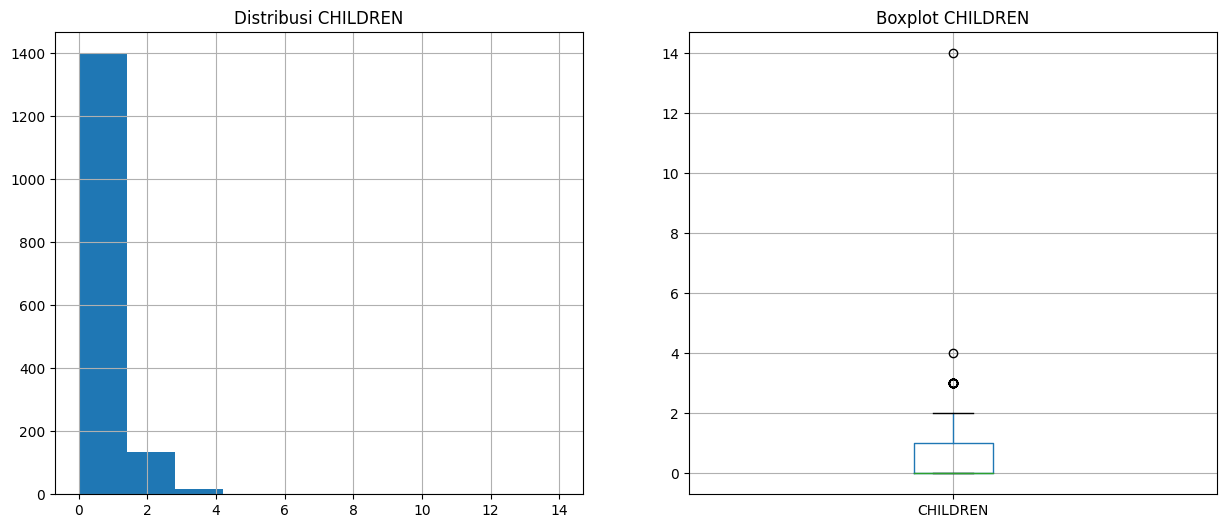

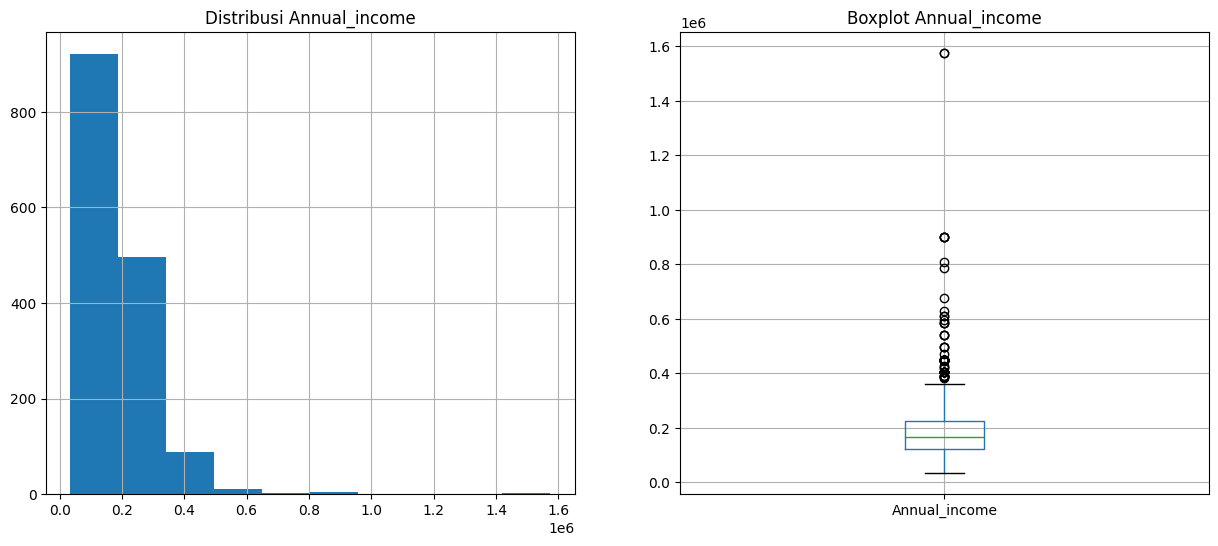

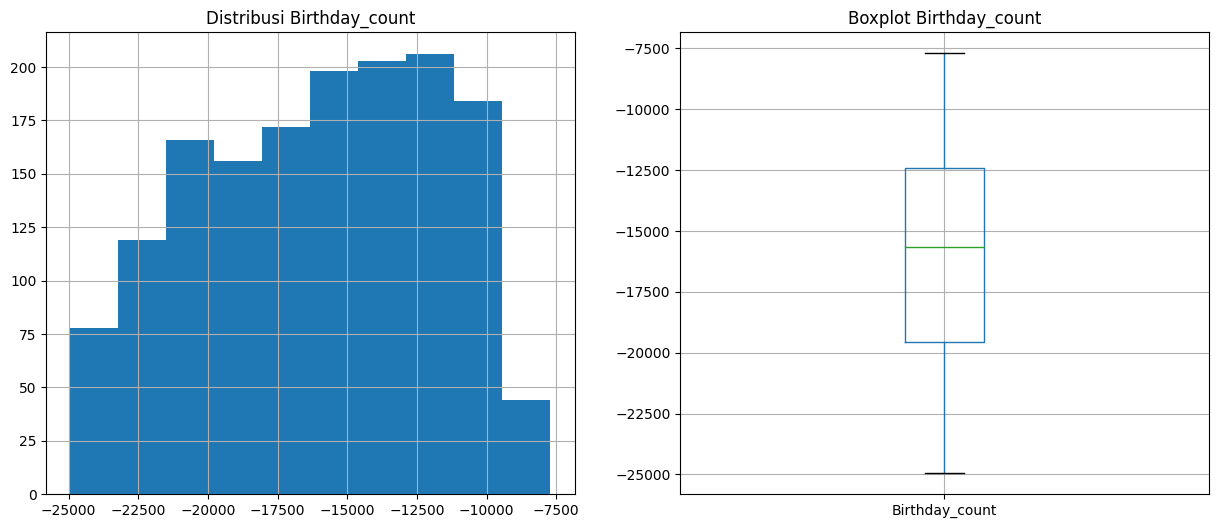

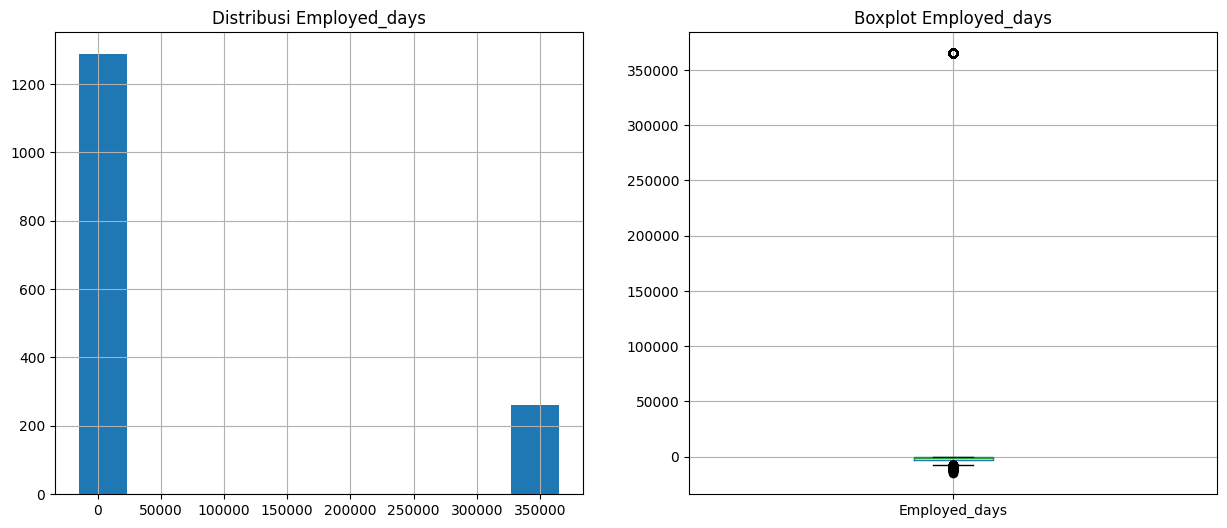

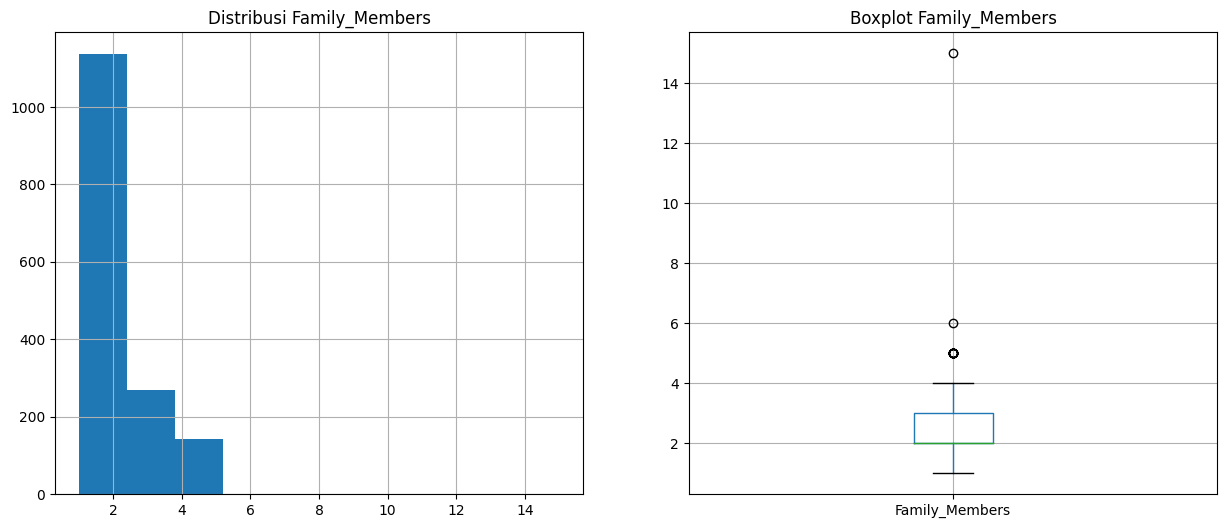

In [11]:
# Visualisasi distribusi data numerik dan boxplotnya yang hasilnya jejeran.
for feature in numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[feature].hist()
    plt.title('Distribusi ' + feature)
    plt.subplot(1, 2, 2)
    data.boxplot(column=feature)
    plt.title('Boxplot ' + feature)
    plt.show()

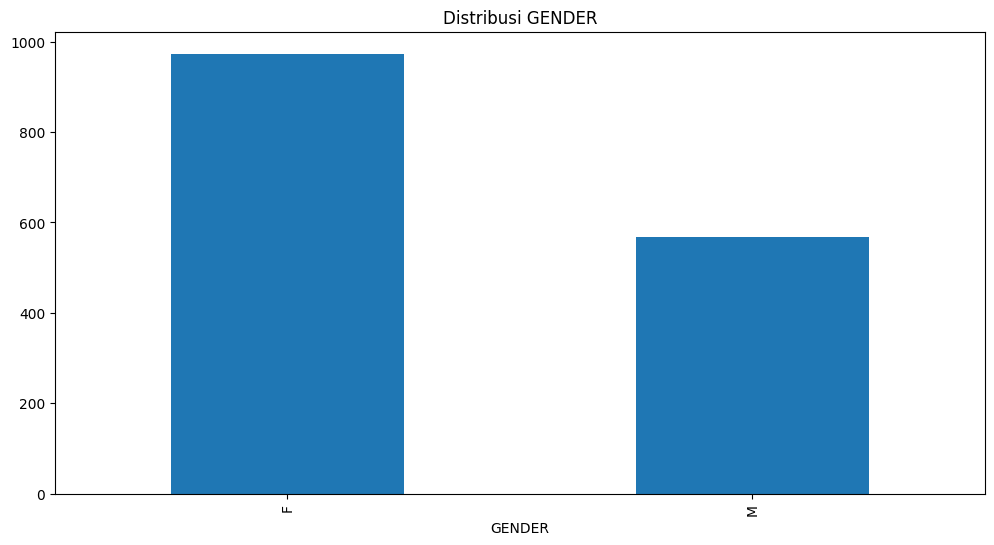

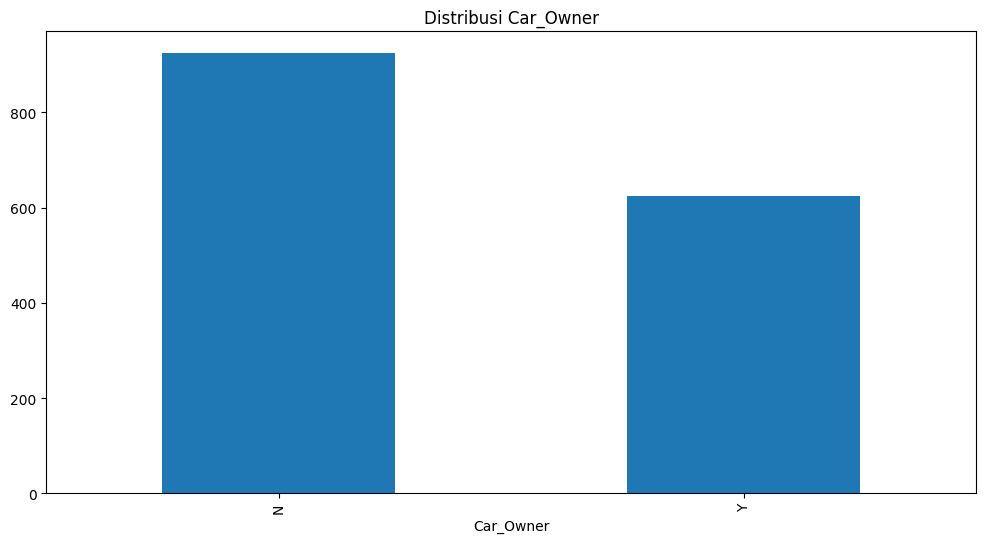

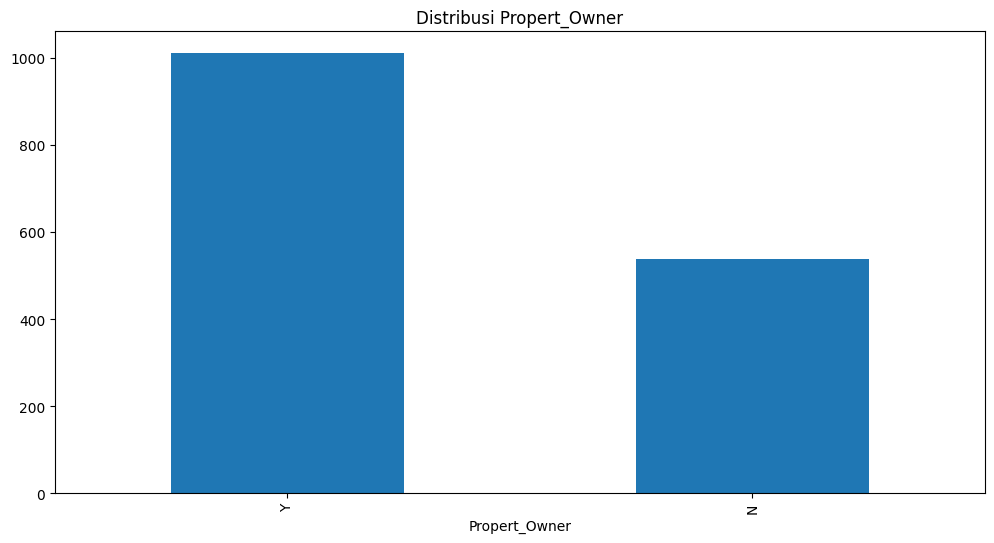

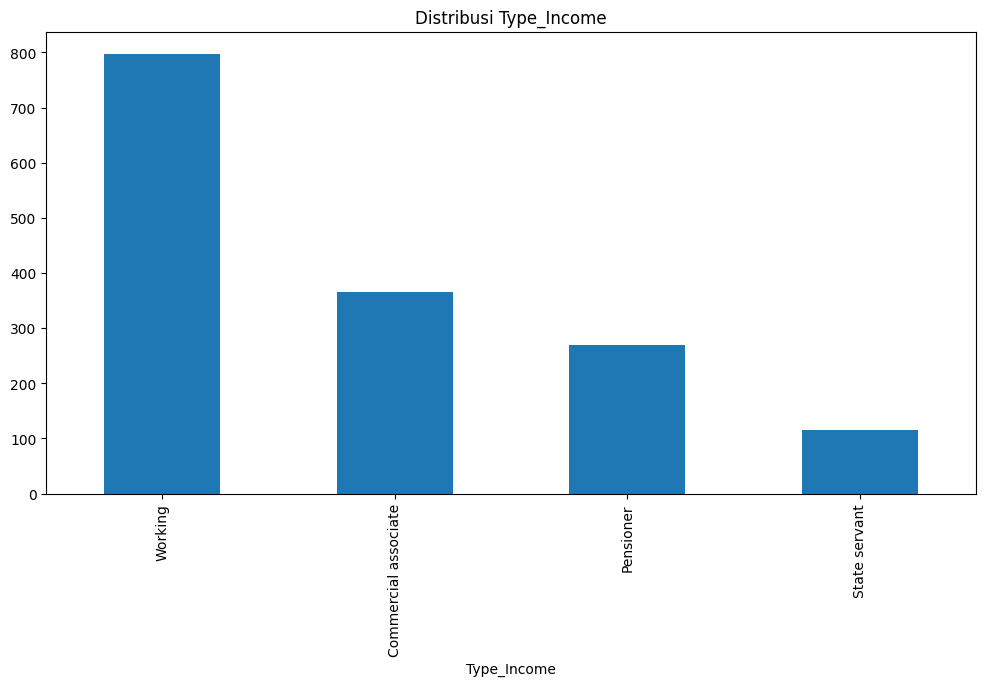

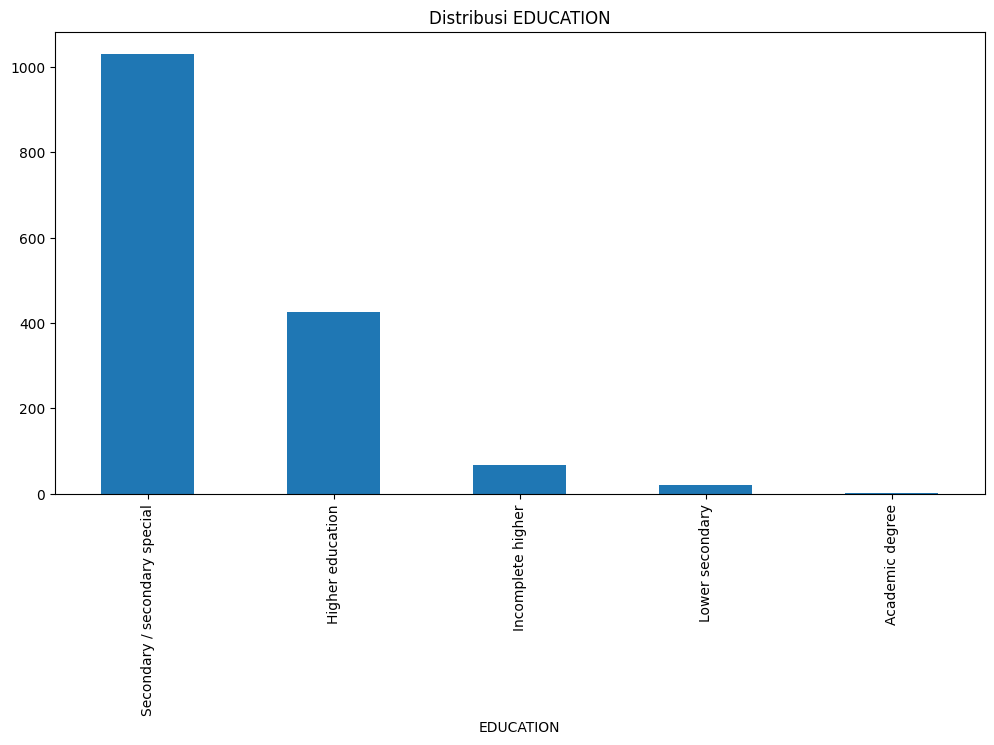

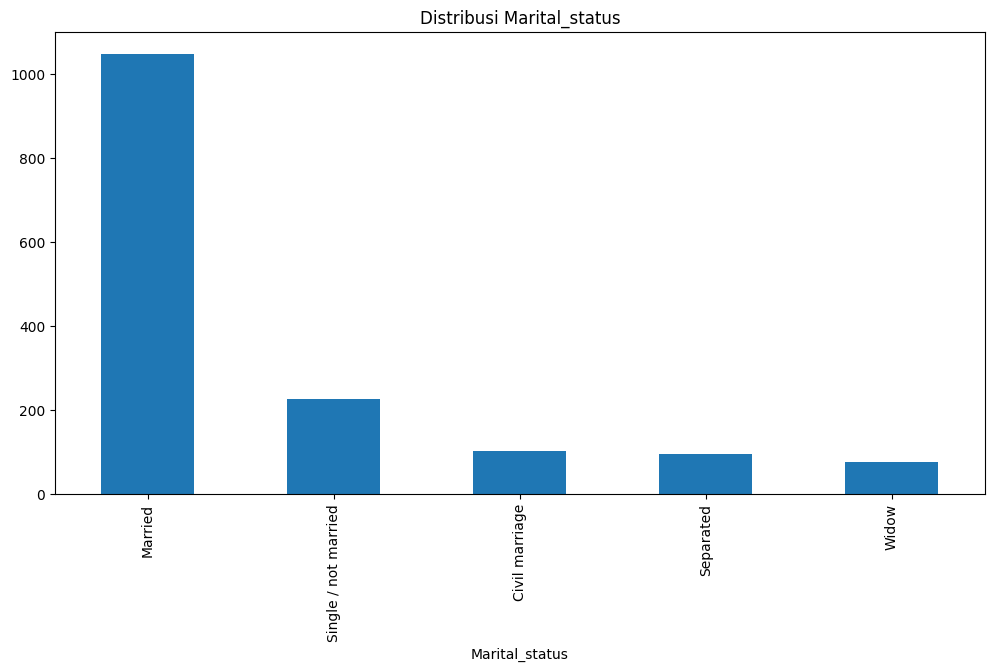

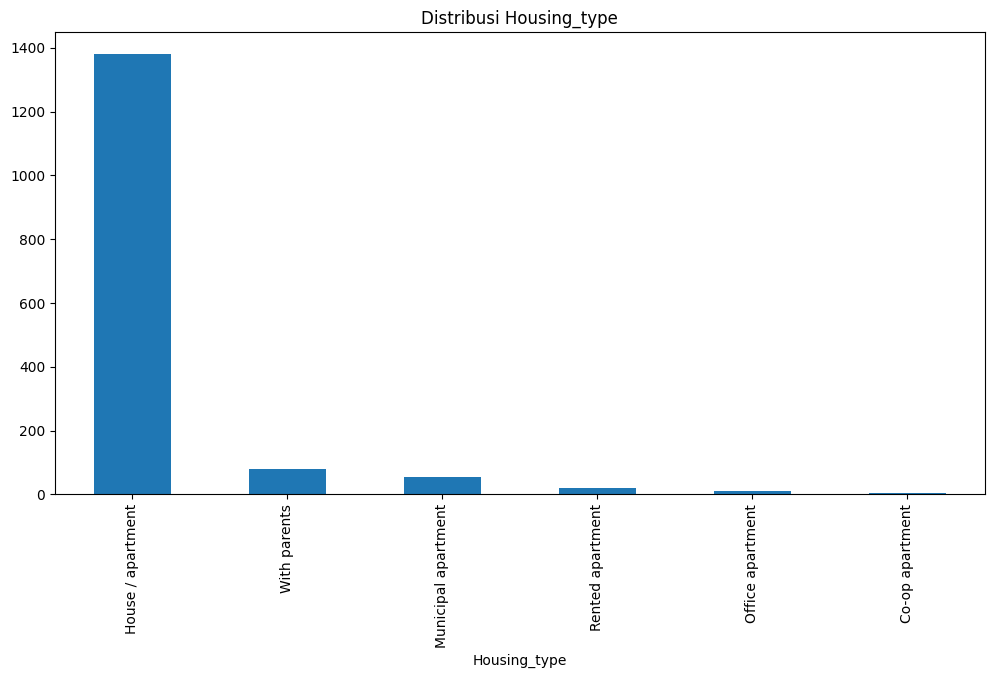

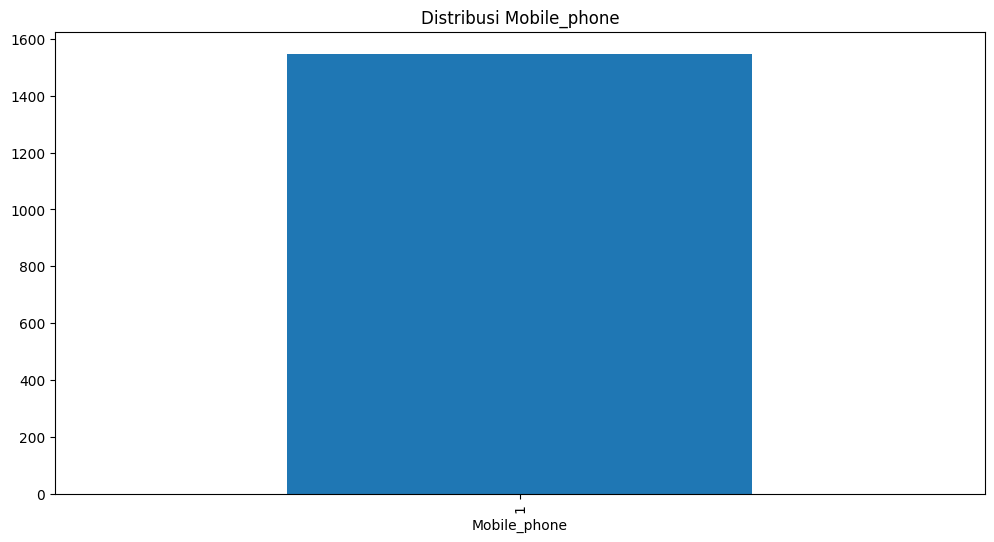

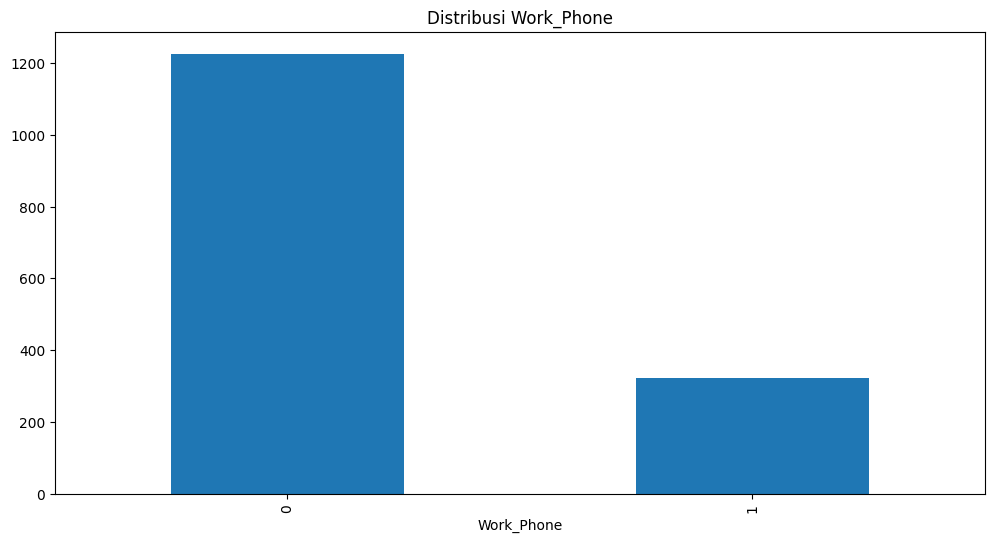

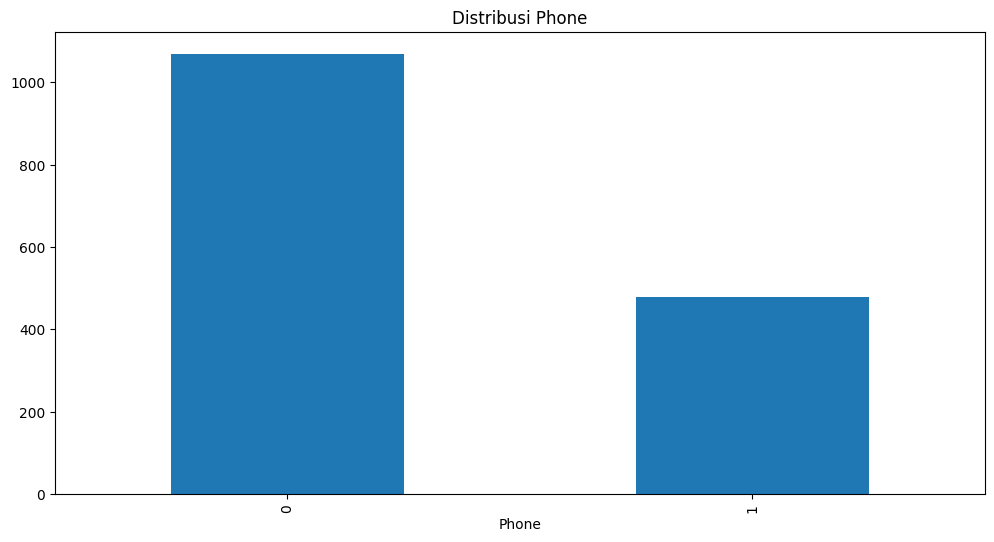

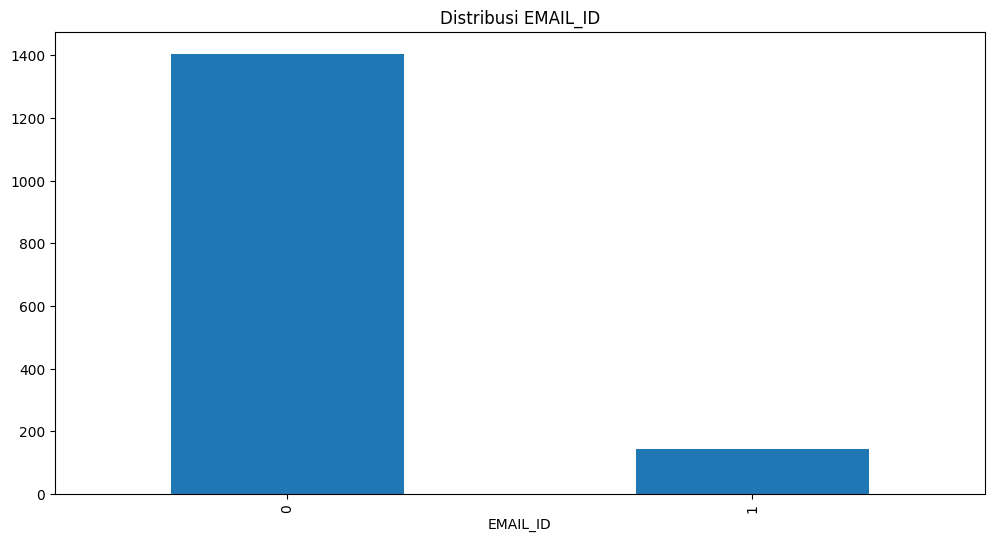

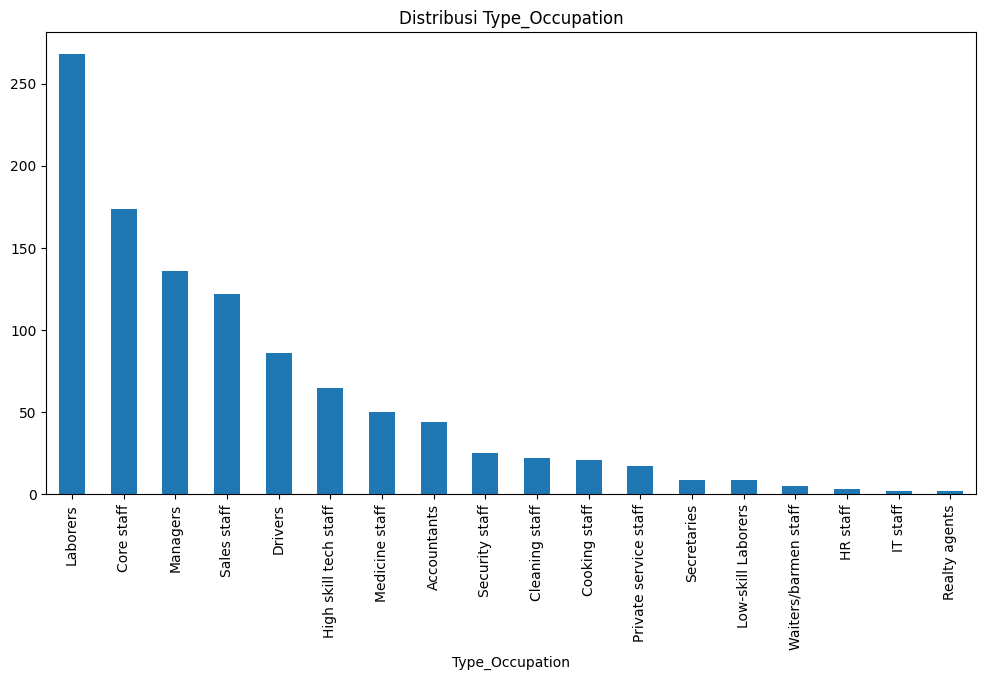

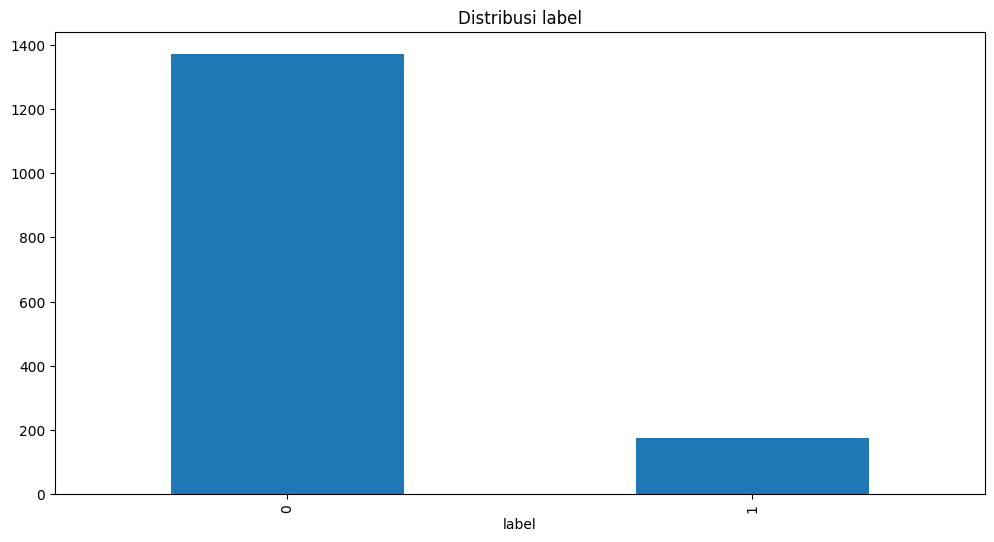

In [12]:
# Membuat barchart untuk data kategorik
for feature in categorical_features:
    plt.figure(figsize=(12,6))
    data[feature].value_counts().plot(kind='bar')
    plt.title('Distribusi ' + feature)
    plt.show()

In [8]:
# Membuang feature 'Mobile_phone' karena hanya memiliki satu nilai
data = data.drop(columns=['Mobile_phone'])

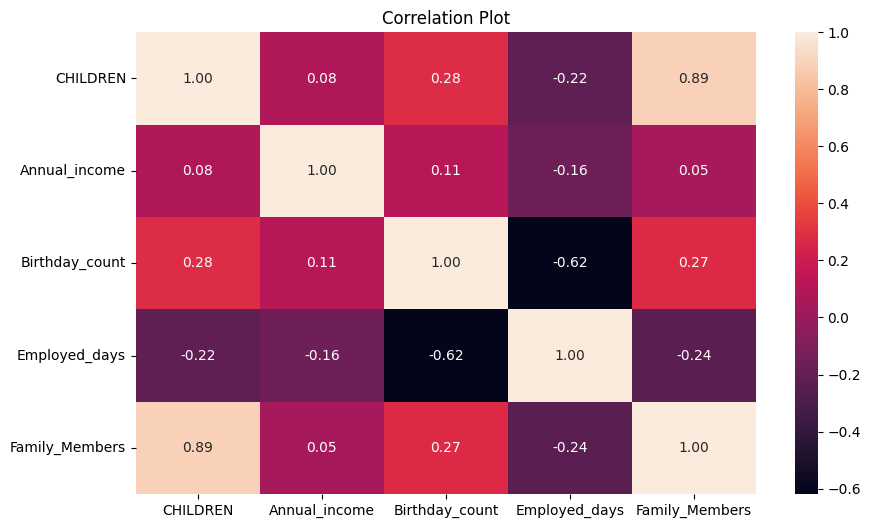

In [14]:
# Correlation Plot untuk data numerik
plt.figure(figsize=(10,6))
sns.heatmap(data[numerical_features].corr(), annot=True, fmt='.2f')
plt.title('Correlation Plot')
plt.show()


# Modeling - 1
---

In [23]:
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

In [25]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [26]:
# # Function to convert sparse matrix to dense
# dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

In [27]:
# Step 4: Set Up Oversampling
oversampler = SMOTE(random_state=42)

In [28]:
# Step 5: Define Models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Classifier', SVC(probability=True, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis())
]

In [29]:
# Step 6: Create and Evaluate Pipeline
results = {}
for name, model in models:
    pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('oversampler', oversampler),
                                  ('classifier', model)])
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))
    results[name] = scores.mean()
    print(f'{name}: {scores.mean():.4f}')

# Printing the results
print("Model Evaluation Results:")
for model, score in results.items():
    print(f'{model}: {score:.4f}')

Logistic Regression: 0.6422
K-Nearest Neighbors: 0.6882
Support Vector Classifier: 0.7964
Decision Tree: 0.8417
Random Forest: 0.9120
Gradient Boosting: 0.8821
AdaBoost: 0.7916


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py", line 263, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py", line 423, in _partial_fit
    X, y = self._validate_data(X, y, reset=first_call)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 883, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 534, in _ensure_sparse_format
    raise TypeError(
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


In [18]:
from lazypredict.Supervised import LazyClassifier

In [35]:
# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Step 5: Oversampling
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

X_train_resampled_dense = X_train_resampled.toarray()
X_test_processed_dense = X_test_processed.toarray()

# Preprocess the data
X_train_resampled = pd.DataFrame(X_train_resampled_dense)
X_test_processed = pd.DataFrame(X_test_processed_dense)

# Step 6: Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

 97%|█████████▋| 28/29 [00:06<00:00,  4.48it/s]

[LightGBM] [Info] Number of positive: 1093, number of negative: 1093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 2186, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:06<00:00,  4.15it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.93               0.71     0.71      0.92   
NuSVC                              0.82               0.69     0.69      0.84   
LGBMClassifier                     0.92               0.69     0.69      0.91   
DecisionTreeClassifier             0.84               0.69     0.69      0.85   
LabelPropagation                   0.86               0.69     0.69      0.87   
LabelSpreading                     0.86               0.69     0.69      0.87   
SVC                                0.81               0.68     0.68      0.83   
ExtraTreesClassifier               0.91               0.68     0.68      0.91   
BaggingClassifier                  0.91               0.68     0.68      0.90   
XGBClassifier                      0.92               0.67     0.67      0.91   
KNeighborsClassifier        

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Step 6: Define the Random Forest Classifier and Hyperparameter Grid
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 7: Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 8: Print Best Parameters and Score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

# Step 9: Evaluate on Test Set
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test_processed, y_test)
print(f"Test Accuracy: {test_score:.4f}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9630
Test Accuracy: 0.9323


# Modeling - 2

Ganti Scaler jadi Robust Scaler

In [36]:
from sklearn.preprocessing import RobustScaler

In [37]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [38]:
# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

In [39]:
# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', dense_transformer)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 5: Oversampling
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Step 6: Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

 97%|█████████▋| 28/29 [00:08<00:00,  4.45it/s]

[LightGBM] [Info] Number of positive: 1093, number of negative: 1093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2536
[LightGBM] [Info] Number of data points in the train set: 2186, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:08<00:00,  3.45it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.83               0.71     0.71      0.85   
SVC                                0.82               0.71     0.71      0.84   
ExtraTreesClassifier               0.92               0.70     0.70      0.91   
BaggingClassifier                  0.91               0.70     0.70      0.90   
LGBMClassifier                     0.92               0.69     0.69      0.91   
DecisionTreeClassifier             0.84               0.69     0.69      0.86   
XGBClassifier                      0.92               0.69     0.69      0.91   
LabelPropagation                   0.85               0.68     0.68      0.87   
LabelSpreading                     0.85               0.68     0.68      0.87   
RandomForestClassifier             0.93               0.68     0.68      0.92   
KNeighborsClassifier        

# Modeling - 3

Dari Modeling-1 ganti SMOTE

In [16]:
from imblearn.over_sampling import ADASYN

In [41]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# # Function to convert sparse matrix to dense
# dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

In [46]:
# Step 4: Set Up Oversampling with ADASYN
oversampler = ADASYN(random_state=42)

In [43]:
# Step 4: Set Up Oversampling with Borderline-SMOTE
from imblearn.over_sampling import BorderlineSMOTE

oversampler = BorderlineSMOTE(random_state=42)

In [ ]:
# Step 4: Set Up Oversampling with SVMSMOTE
from imblearn.over_sampling import SVMSMOTE

oversampler = SVMSMOTE(random_state=42)


In [22]:
# Step 4: Set Up Undersampling with TomekLinks
from imblearn.under_sampling import TomekLinks

undersampler = TomekLinks()


In [ ]:
# Step 4: Set Up Undersampling with NearMiss
from imblearn.under_sampling import NearMiss

undersampler = NearMiss(version=1)


In [20]:
# Step 4: Set Up Combined Sampling with SMOTETomek
from imblearn.combine import SMOTETomek

combiner = SMOTETomek(random_state=42)


In [ ]:
# Step 4: Set Up Combined Sampling with SMOTEENN
from imblearn.combine import SMOTEENN

combiner = SMOTEENN(random_state=42)


In [48]:
# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', dense_transformer)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 5: Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Step 6: Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

 97%|█████████▋| 28/29 [00:10<00:00,  3.37it/s]

[LightGBM] [Info] Number of positive: 1075, number of negative: 1093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2597
[LightGBM] [Info] Number of data points in the train set: 2168, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495849 -> initscore=-0.016606
[LightGBM] [Info] Start training from score -0.016606


100%|██████████| 29/29 [00:11<00:00,  2.59it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.94               0.74     0.74      0.93   
XGBClassifier                      0.94               0.73     0.73      0.93   
NuSVC                              0.84               0.70     0.70      0.85   
SVC                                0.83               0.70     0.70      0.85   
ExtraTreesClassifier               0.90               0.69     0.69      0.90   
LabelPropagation                   0.87               0.69     0.69      0.88   
LabelSpreading                     0.87               0.69     0.69      0.88   
KNeighborsClassifier               0.77               0.68     0.68      0.81   
RidgeClassifierCV                  0.70               0.67     0.67      0.76   
RidgeClassifier                    0.70               0.67     0.67      0.76   
LinearDiscriminantAnalysis  

In [ ]:
# Step 6: Define the Random Forest Classifier and Hyperparameter Grid
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 7: Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 8: Print Best Parameters and Score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

# Step 9: Evaluate on Test Set
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test_processed, y_test)
print(f"Test Accuracy: {test_score:.4f}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9461
Test Accuracy: 0.9290


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Assuming you have defined numeric_features and categorical_features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
def to_dense(x):
    return x.toarray()

dense_transformer = FunctionTransformer(to_dense, accept_sparse=True)


In [ ]:
# Step 4: Set Up Oversampling with ADASYN
oversampler = ADASYN(random_state=42)


In [ ]:
# Step 4: Create and Apply Pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', oversampler),
    ('classifier', XGBClassifier(random_state=42))
])

NameError: name 'XGBClassifier' is not defined

In [ ]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on test data
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: ", test_accuracy)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best parameters found:  {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best cross-validation accuracy:  0.9014492583276522
Test set accuracy:  0.9258064516129032


# Modeling - 4

Pake Modeling 3 + Ganti Isi missing value

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

In [ ]:
# Numeric transformer with KNNImputer
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=10)),  # You can adjust n_neighbors as needed
    ('scaler', StandardScaler())])

# Categorical transformer with SimpleImputer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
# Numeric transformer with IterativeImputer
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=0)),  # You can set random_state for reproducibility
    ('scaler', StandardScaler())])

# Categorical transformer with SimpleImputer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
# # Function to convert sparse matrix to dense
# dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

In [ ]:
# Step 4: Set Up Oversampling with ADASYN
oversampler = ADASYN(random_state=42)

In [ ]:
# Step 4: Set Up Oversampling
oversampler = SMOTE(random_state=42)

In [ ]:
# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 5: Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Step 6: Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

 97%|█████████▋| 28/29 [00:08<00:00,  4.20it/s]

[LightGBM] [Info] Number of positive: 1084, number of negative: 1093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3081
[LightGBM] [Info] Number of data points in the train set: 2177, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497933 -> initscore=-0.008268
[LightGBM] [Info] Start training from score -0.008268


100%|██████████| 29/29 [00:08<00:00,  3.43it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.74               0.72     0.72      0.79   
LabelPropagation                   0.87               0.72     0.72      0.88   
LabelSpreading                     0.87               0.72     0.72      0.88   
ExtraTreeClassifier                0.86               0.72     0.72      0.88   
SVC                                0.84               0.72     0.72      0.86   
RandomForestClassifier             0.94               0.71     0.71      0.93   
NuSVC                              0.83               0.71     0.71      0.85   
BaggingClassifier                  0.93               0.69     0.69      0.92   
ExtraTreesClassifier               0.93               0.69     0.69      0.92   
XGBClassifier                      0.91               0.68     0.68      0.91   
LGBMClassifier              

# Modeling - 5

Diskritisasi dari model 3

In [ ]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,0,0,0,NaN,2,1
1,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
2,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
4,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,0,0,0,Managers,2,0
1544,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,0,0,0,Accountants,1,0
1545,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,0,0,0,Managers,4,0
1546,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,0,Drivers,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GENDER           1541 non-null   object  
 1   Car_Owner        1548 non-null   object  
 2   Propert_Owner    1548 non-null   object  
 3   CHILDREN         1548 non-null   int64   
 4   Annual_income    1525 non-null   float64 
 5   Type_Income      1548 non-null   object  
 6   EDUCATION        1548 non-null   object  
 7   Marital_status   1548 non-null   object  
 8   Housing_type     1548 non-null   object  
 9   Birthday_count   1526 non-null   float64 
 10  Employed_days    1548 non-null   int64   
 11  Work_Phone       1548 non-null   category
 12  Phone            1548 non-null   category
 13  EMAIL_ID         1548 non-null   category
 14  Type_Occupation  1060 non-null   object  
 15  Family_Members   1548 non-null   int64   
 16  label            1548 non-null   category


In [ ]:
numerical_features

Index(['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days',
       'Family_Members'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, KBinsDiscretizer

In [ ]:
# Define your features
all_numeric_features = ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']
numeric_features_to_discretize = ['Birthday_count', 'Employed_days']
other_numeric_features = ['CHILDREN', 'Annual_income', 'Family_Members']
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

In [ ]:
# Define the numeric transformer for discretizing specific features
discretizer_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('discretizer', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')),
    ('scaler', StandardScaler())
])

# Define the numeric transformer for other numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_discretize', discretizer_transformer, numeric_features_to_discretize),
        ('num', numeric_transformer, other_numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# # Function to convert sparse matrix to dense
# dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)


In [ ]:
# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

In [ ]:
# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', dense_transformer)
])

# Assuming you have defined X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:07<00:00,  3.84it/s]

[LightGBM] [Info] Number of positive: 1099, number of negative: 1093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 2192, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501369 -> initscore=0.005474
[LightGBM] [Info] Start training from score 0.005474


100%|██████████| 29/29 [00:07<00:00,  3.73it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.80               0.71     0.71      0.83   
SVC                                0.78               0.70     0.70      0.82   
LabelSpreading                     0.85               0.68     0.68      0.86   
LabelPropagation                   0.85               0.68     0.68      0.86   
KNeighborsClassifier               0.77               0.65     0.65      0.81   
DecisionTreeClassifier             0.85               0.65     0.65      0.86   
XGBClassifier                      0.89               0.63     0.63      0.88   
RandomForestClassifier             0.91               0.62     0.62      0.89   
ExtraTreesClassifier               0.90               0.62     0.62      0.89   
LGBMClassifier                     0.89               0.61     0.61      0.88   
BaggingClassifier           

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from lazypredict.Supervised import LazyClassifier
from sklearn.cluster import KMeans

# Define your features
all_numeric_features = ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']
numeric_features_to_discretize = ['Employed_days']
other_numeric_features = ['CHILDREN', 'Annual_income', 'Family_Members','Birthday_count']
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

# Custom function for K-Means clustering discretization
def kmeans_discretizer(X, n_clusters=2, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    return kmeans.predict(X).reshape(-1, 1)

# Wrapper function to use with FunctionTransformer
def kmeans_discretizer_wrapper(X):
    return np.hstack([kmeans_discretizer(X[:, [i]], n_clusters=5) for i in range(X.shape[1])])

# Define the numeric transformer for discretizing specific features with K-Means
discretizer_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('kmeans_discretizer', FunctionTransformer(kmeans_discretizer_wrapper)),
    ('scaler', StandardScaler())
])

# Define the numeric transformer for other numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_discretize', discretizer_transformer, numeric_features_to_discretize),
        ('num', numeric_transformer, other_numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with SMOTE
oversampler = SMOTE(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', dense_transformer)
])

# Assuming you have defined X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)


 97%|█████████▋| 28/29 [00:08<00:00,  4.24it/s]

[LightGBM] [Info] Number of positive: 1093, number of negative: 1093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 2186, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:08<00:00,  3.41it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.78               0.69     0.69      0.82   
LabelPropagation                   0.84               0.69     0.69      0.85   
LabelSpreading                     0.83               0.68     0.68      0.85   
NuSVC                              0.79               0.68     0.68      0.82   
ExtraTreesClassifier               0.92               0.67     0.67      0.91   
RandomForestClassifier             0.92               0.67     0.67      0.91   
LGBMClassifier                     0.90               0.66     0.66      0.89   
KNeighborsClassifier               0.76               0.66     0.66      0.80   
BaggingClassifier                  0.91               0.65     0.65      0.90   
ExtraTreeClassifier                0.79               0.65     0.65      0.82   
XGBClassifier               

# Modeling - 6

Pembuatan fitur baru dengan basemodel 3

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GENDER           1541 non-null   object  
 1   Car_Owner        1548 non-null   object  
 2   Propert_Owner    1548 non-null   object  
 3   CHILDREN         1548 non-null   int64   
 4   Annual_income    1525 non-null   float64 
 5   Type_Income      1548 non-null   object  
 6   EDUCATION        1548 non-null   object  
 7   Marital_status   1548 non-null   object  
 8   Housing_type     1548 non-null   object  
 9   Birthday_count   1526 non-null   float64 
 10  Employed_days    1548 non-null   int64   
 11  Work_Phone       1548 non-null   category
 12  Phone            1548 non-null   category
 13  EMAIL_ID         1548 non-null   category
 14  Type_Occupation  1060 non-null   object  
 15  Family_Members   1548 non-null   int64   
 16  label            1548 non-null   category


In [ ]:
import pandas as pd

# Assuming data is your DataFrame
data['Years_Employed'] = data['Employed_days'] // 365


In [ ]:
# Menghapus feature 'Years_Employed'
data = data.drop(columns=['Years_Employed'])

In [ ]:
numeric_features = ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members', 'Years_Employed']
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']


In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from lazypredict.Supervised import LazyClassifier

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
# Ambil fitur numerik dan kategorik
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)


 97%|█████████▋| 28/29 [00:10<00:00,  3.64it/s]

[LightGBM] [Info] Number of positive: 1085, number of negative: 1093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3290
[LightGBM] [Info] Number of data points in the train set: 2178, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498163 -> initscore=-0.007346
[LightGBM] [Info] Start training from score -0.007346


100%|██████████| 29/29 [00:11<00:00,  2.44it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.86               0.76     0.76      0.87   
KNeighborsClassifier               0.77               0.74     0.74      0.81   
XGBClassifier                      0.94               0.73     0.73      0.93   
ExtraTreesClassifier               0.93               0.72     0.72      0.93   
NuSVC                              0.85               0.72     0.72      0.87   
SVC                                0.85               0.72     0.72      0.86   
RandomForestClassifier             0.94               0.71     0.71      0.93   
LabelPropagation                   0.87               0.71     0.71      0.88   
LabelSpreading                     0.87               0.71     0.71      0.88   
ExtraTreeClassifier                0.86               0.70     0.70      0.87   
BaggingClassifier           

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming data is your DataFrame and it has a 'label' column for the target variable
data['Years_Employed'] = data['Employed_days'] // 365
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Fit each model and print classification report
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


RandomForest Accuracy: 0.9419
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       0.93      0.43      0.59        30

    accuracy                           0.94       310
   macro avg       0.94      0.71      0.78       310
weighted avg       0.94      0.94      0.93       310

------------------------------------------------------------
Bagging Accuracy: 0.9323
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       280
           1       0.80      0.40      0.53        30

    accuracy                           0.93       310
   macro avg       0.87      0.69      0.75       310
weighted avg       0.93      0.93      0.92       310

------------------------------------------------------------
ExtraTrees Accuracy: 0.9323
Classification Report for ExtraTrees:
              precision    r

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming data is your DataFrame and it has a 'label' column for the target variable
# data['Years_Employed'] = data['Employed_days'] // 365
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Fit each model and print classification report
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


RandomForest Accuracy: 0.9419
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       1.00      0.40      0.57        30

    accuracy                           0.94       310
   macro avg       0.97      0.70      0.77       310
weighted avg       0.95      0.94      0.93       310

------------------------------------------------------------
Bagging Accuracy: 0.9452
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       1.00      0.43      0.60        30

    accuracy                           0.95       310
   macro avg       0.97      0.72      0.79       310
weighted avg       0.95      0.95      0.94       310

------------------------------------------------------------
ExtraTrees Accuracy: 0.9290
Classification Report for ExtraTrees:
              precision    r

# Modeling - 7

Dari modeling - 6, diperbanyak lagi variabelnya

In [17]:
# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
# data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# # Function to convert sparse matrix to dense
# dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Fit each model and print classification report
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

NameError: name 'BaggingClassifier' is not defined

# Modeling - 8

Neural Network

In [9]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with SMOTETomek
oversampler = SMOTETomek(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the ANN model
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
ann_model = KerasClassifier(build_fn=create_ann_model, epochs=150, batch_size=10, verbose=0)

# Fit the ANN model and print the classification report
ann_model.fit(X_train_resampled, y_train_resampled)
y_pred = ann_model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model Accuracy: {accuracy:.4f}")
print("Classification Report for ANN Model:")
print(classification_report(y_test, y_pred))
print("-" * 60)

10/10 [==============================] - 0s 2ms/step
ANN Model Accuracy: 0.8839
Classification Report for ANN Model:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       275
           1       0.48      0.46      0.47        35

    accuracy                           0.88       310
   macro avg       0.71      0.70      0.70       310
weighted avg       0.88      0.88      0.88       310

------------------------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with SMOTETomek
oversampler = SMOTETomek(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the ANN model
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
ann_model = KerasClassifier(build_fn=create_ann_model, epochs=150, batch_size=10, verbose=0)

# Fit the ANN model and print the classification report
ann_model.fit(X_train_resampled, y_train_resampled)
y_pred = ann_model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model Accuracy: {accuracy:.4f}")
print("Classification Report for ANN Model:")
print(classification_report(y_test, y_pred))
print("-" * 60)

10/10 [==============================] - 0s 3ms/step
ANN Model Accuracy: 0.8903
Classification Report for ANN Model:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       280
           1       0.44      0.50      0.47        30

    accuracy                           0.89       310
   macro avg       0.69      0.72      0.70       310
weighted avg       0.90      0.89      0.89       310

------------------------------------------------------------


In [ ]:
# Define the ANN model with more layers and neurons
def create_ann_model_1():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
ann_model_1 = KerasClassifier(build_fn=create_ann_model_1, epochs=100, batch_size=10, verbose=0)

# Fit the ANN model and print the classification report
ann_model_1.fit(X_train_resampled, y_train_resampled)
y_pred = ann_model_1.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model 1 Accuracy: {accuracy:.4f}")
print("Classification Report for ANN Model 1:")
print(classification_report(y_test, y_pred))
print("-" * 60)


10/10 [==============================] - 0s 2ms/step
ANN Model 1 Accuracy: 0.9065
Classification Report for ANN Model 1:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       280
           1       0.52      0.47      0.49        30

    accuracy                           0.91       310
   macro avg       0.73      0.71      0.72       310
weighted avg       0.90      0.91      0.90       310

------------------------------------------------------------


In [ ]:
# Define the ANN model with different activation functions
def create_ann_model_2():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
ann_model_2 = KerasClassifier(build_fn=create_ann_model_2, epochs=100, batch_size=10, verbose=0)

# Fit the ANN model and print the classification report
ann_model_2.fit(X_train_resampled, y_train_resampled)
y_pred = ann_model_2.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model 2 Accuracy: {accuracy:.4f}")
print("Classification Report for ANN Model 2:")
print(classification_report(y_test, y_pred))
print("-" * 60)


10/10 [==============================] - 0s 2ms/step
ANN Model 2 Accuracy: 0.8839
Classification Report for ANN Model 2:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       280
           1       0.42      0.53      0.47        30

    accuracy                           0.88       310
   macro avg       0.68      0.73      0.70       310
weighted avg       0.90      0.88      0.89       310

------------------------------------------------------------


In [ ]:
from tensorflow.keras.optimizers import Adam

# Define the ANN model with a different optimizer and learning rate
def create_ann_model_3():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
ann_model_3 = KerasClassifier(build_fn=create_ann_model_3, epochs=100, batch_size=10, verbose=0)

# Fit the ANN model and print the classification report
ann_model_3.fit(X_train_resampled, y_train_resampled)
y_pred = ann_model_3.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model 3 Accuracy: {accuracy:.4f}")
print("Classification Report for ANN Model 3:")
print(classification_report(y_test, y_pred))
print("-" * 60)


10/10 [==============================] - 0s 2ms/step
ANN Model 3 Accuracy: 0.8935
Classification Report for ANN Model 3:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       280
           1       0.45      0.47      0.46        30

    accuracy                           0.89       310
   macro avg       0.70      0.70      0.70       310
weighted avg       0.90      0.89      0.89       310

------------------------------------------------------------


In [ ]:
from tensorflow.keras.layers import Dropout

# Define the ANN model with dropout for regularization
def create_ann_model_4():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
ann_model_4 = KerasClassifier(build_fn=create_ann_model_4, epochs=100, batch_size=10, verbose=0)

# Fit the ANN model and print the classification report
ann_model_4.fit(X_train_resampled, y_train_resampled)
y_pred = ann_model_4.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model 4 Accuracy: {accuracy:.4f}")
print("Classification Report for ANN Model 4:")
print(classification_report(y_test, y_pred))
print("-" * 60)


10/10 [==============================] - 0s 4ms/step
ANN Model 4 Accuracy: 0.9161
Classification Report for ANN Model 4:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       280
           1       0.59      0.43      0.50        30

    accuracy                           0.92       310
   macro avg       0.77      0.70      0.73       310
weighted avg       0.91      0.92      0.91       310

------------------------------------------------------------


# Modeling - 9

Dari modeling - 7, akan dicek dengan resampling lainnya

In [ ]:
# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
# data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
# dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Fit each model and print classification report
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

RandomForest Accuracy: 0.9258
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       280
           1       0.71      0.40      0.51        30

    accuracy                           0.93       310
   macro avg       0.82      0.69      0.74       310
weighted avg       0.92      0.93      0.92       310

------------------------------------------------------------
Bagging Accuracy: 0.9258
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       280
           1       0.67      0.47      0.55        30

    accuracy                           0.93       310
   macro avg       0.81      0.72      0.75       310
weighted avg       0.92      0.93      0.92       310

------------------------------------------------------------
ExtraTrees Accuracy: 0.9161
Classification Report for ExtraTrees:
              precision    r

In [ ]:
# Hapus fitur Children_per_Family_Member dari data
data.drop('Children_per_Family_Member', axis=1, inplace=True)

In [ ]:
# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
# data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with ADASYN
oversampler = SMOTETomek(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Fit each model and print classification report
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

RandomForest Accuracy: 0.9452
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       280
           1       0.93      0.47      0.62        30

    accuracy                           0.95       310
   macro avg       0.94      0.73      0.80       310
weighted avg       0.94      0.95      0.94       310

------------------------------------------------------------
Bagging Accuracy: 0.9290
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       280
           1       0.75      0.40      0.52        30

    accuracy                           0.93       310
   macro avg       0.84      0.69      0.74       310
weighted avg       0.92      0.93      0.92       310

------------------------------------------------------------
ExtraTrees Accuracy: 0.9290
Classification Report for ExtraTrees:
              precision    r

In [ ]:
# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with ADASYN
oversampler = BorderlineSMOTE(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Fit each model and print classification report
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

RandomForest Accuracy: 0.9290
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       280
           1       0.75      0.40      0.52        30

    accuracy                           0.93       310
   macro avg       0.84      0.69      0.74       310
weighted avg       0.92      0.93      0.92       310

------------------------------------------------------------
Bagging Accuracy: 0.9226
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       280
           1       0.62      0.50      0.56        30

    accuracy                           0.92       310
   macro avg       0.79      0.73      0.76       310
weighted avg       0.92      0.92      0.92       310

------------------------------------------------------------
ExtraTrees Accuracy: 0.9194
Classification Report for ExtraTrees:
              precision    r

In [ ]:
# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0
data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# Convert new categorical features to object type
data['Is_Employed'] = data['Is_Employed'].astype('category')
data['Age_Group'] = data['Age_Group'].astype('category')

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Set up oversampling with ADASYN
oversampler = SMOTEENN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Fit each model and print classification report
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

RandomForest Accuracy: 0.9065
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       280
           1       0.52      0.47      0.49        30

    accuracy                           0.91       310
   macro avg       0.73      0.71      0.72       310
weighted avg       0.90      0.91      0.90       310

------------------------------------------------------------
Bagging Accuracy: 0.9032
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       280
           1       0.50      0.47      0.48        30

    accuracy                           0.90       310
   macro avg       0.72      0.71      0.71       310
weighted avg       0.90      0.90      0.90       310

------------------------------------------------------------
ExtraTrees Accuracy: 0.8710
Classification Report for ExtraTrees:
              precision    r

Tunning use Gridsearch CV for SMOTETomek

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Create the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
    return score

# Create the study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best parameters
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

# Train the model with the best hyperparameters
best_params = study.best_params
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForest with Optuna Tuning Accuracy: {accuracy:.4f}")
print(f"Classification Report for RandomForest with Optuna Tuning:")
print(classification_report(y_test, y_pred))


[I 2024-07-21 09:54:47,198] A new study created in memory with name: no-name-754d4ed0-d423-4a59-b149-a930a051115b


[I 2024-07-21 09:55:03,457] Trial 0 finished with value: 0.8975852376623511 and parameters: {'n_estimators': 644, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_features': 'log2'}. Best is trial 0 with value: 0.8975852376623511.
[I 2024-07-21 09:55:06,838] Trial 1 finished with value: 0.842684137383363 and parameters: {'n_estimators': 168, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8975852376623511.
[I 2024-07-21 09:55:11,992] Trial 2 finished with value: 0.7466098241434438 and parameters: {'n_estimators': 342, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.8975852376623511.
[I 2024-07-21 09:55:19,311] Trial 3 finished with value: 0.8619081951453978 and parameters: {'n_estimators': 328, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 18, 'max_features': 'log2'}. Best is trial 0 with value: 0.8975852376623

Best hyperparameters:  {'n_estimators': 378, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Best score:  0.9483631652090321
RandomForest with Optuna Tuning Accuracy: 0.9161
Classification Report for RandomForest with Optuna Tuning:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       280
           1       0.70      0.23      0.35        30

    accuracy                           0.92       310
   macro avg       0.81      0.61      0.65       310
weighted avg       0.90      0.92      0.90       310



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the model
model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the model with the best hyperparameters
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = best_model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForest with GridSearchCV Tuning Accuracy: {accuracy:.4f}")
print(f"Classification Report for RandomForest with GridSearchCV Tuning:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best hyperparameters:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best score:  0.9588790320052663
RandomForest with GridSearchCV Tuning Accuracy: 0.9419
Classification Report for RandomForest with GridSearchCV Tuning:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       280
           1       0.88      0.47      0.61        30

    accuracy                           0.94       310
   macro avg       0.91      0.73      0.79       310
weighted avg       0.94      0.94      0.93       310



Modeling pake Weighting of Examples. Kelas minoritas kasi penalti lebih besar adn kelas mayor lebih kecil. Stacking Algorithm for Boosting models. 

# Batas Suci


# Coba 1

In [49]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,0,0,0,NaN,2,1
1,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
2,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
4,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,0,0,0,Managers,2,0
1544,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,0,0,0,Accountants,1,0
1545,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,0,0,0,Managers,4,0
1546,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,0,Drivers,2,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GENDER           1541 non-null   object  
 1   Car_Owner        1548 non-null   object  
 2   Propert_Owner    1548 non-null   object  
 3   CHILDREN         1548 non-null   int64   
 4   Annual_income    1525 non-null   float64 
 5   Type_Income      1548 non-null   object  
 6   EDUCATION        1548 non-null   object  
 7   Marital_status   1548 non-null   object  
 8   Housing_type     1548 non-null   object  
 9   Birthday_count   1526 non-null   float64 
 10  Employed_days    1548 non-null   int64   
 11  Work_Phone       1548 non-null   category
 12  Phone            1548 non-null   category
 13  EMAIL_ID         1548 non-null   category
 14  Type_Occupation  1060 non-null   object  
 15  Family_Members   1548 non-null   int64   
 16  label            1548 non-null   category


In [8]:
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

In [10]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [13]:
# Step 4: Set Up Oversampling with ADASYN
oversampler = ADASYN(random_state=42)

In [15]:
# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

In [23]:
# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 5: Oversampling
oversampler = TomekLinks()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Step 6: Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

 97%|█████████▋| 28/29 [00:05<00:00,  5.47it/s]

[LightGBM] [Info] Number of positive: 145, number of negative: 1078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 1223, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118561 -> initscore=-2.006129
[LightGBM] [Info] Start training from score -2.006129


100%|██████████| 29/29 [00:06<00:00,  4.38it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.94               0.71     0.71      0.93   
LGBMClassifier                     0.94               0.68     0.68      0.92   
ExtraTreesClassifier               0.92               0.67     0.67      0.91   
LabelPropagation                   0.88               0.67     0.67      0.88   
LabelSpreading                     0.88               0.67     0.67      0.88   
RandomForestClassifier             0.94               0.67     0.67      0.92   
DecisionTreeClassifier             0.88               0.67     0.67      0.88   
BaggingClassifier                  0.92               0.66     0.66      0.91   
ExtraTreeClassifier                0.84               0.66     0.66      0.85   
NearestCentroid                    0.68               0.55     0.55      0.74   
SGDClassifier               

Coba remove extreme outlier

In [53]:
# make a copy data
data_copy = data.copy()

(1548, 17)


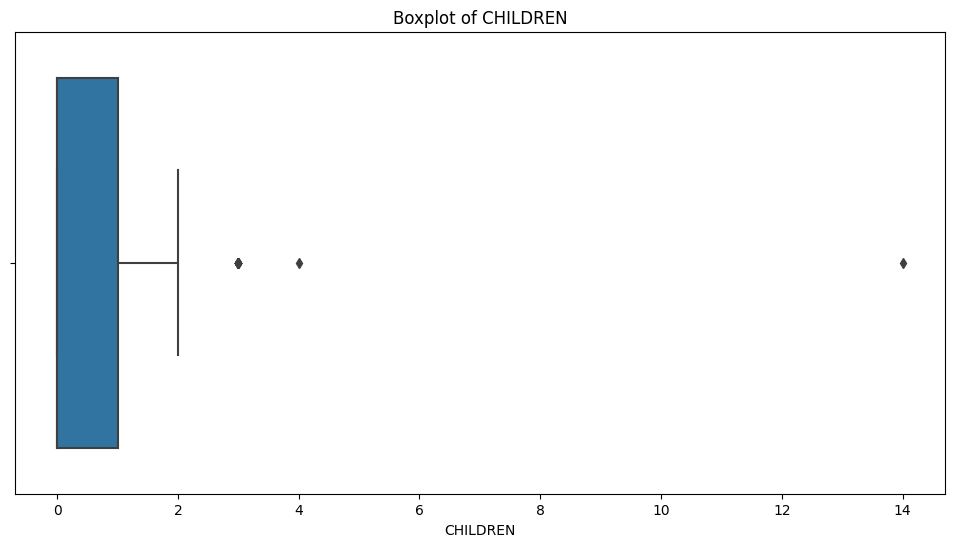

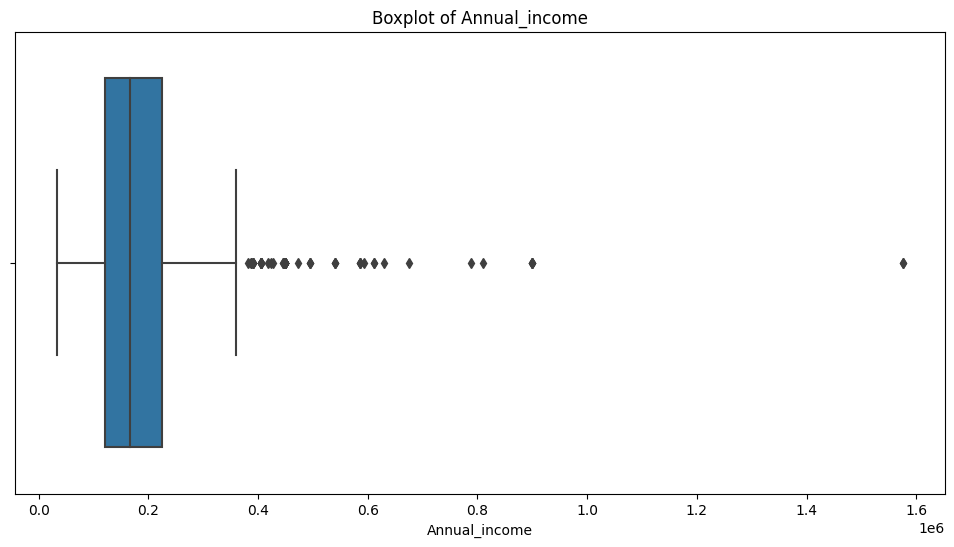

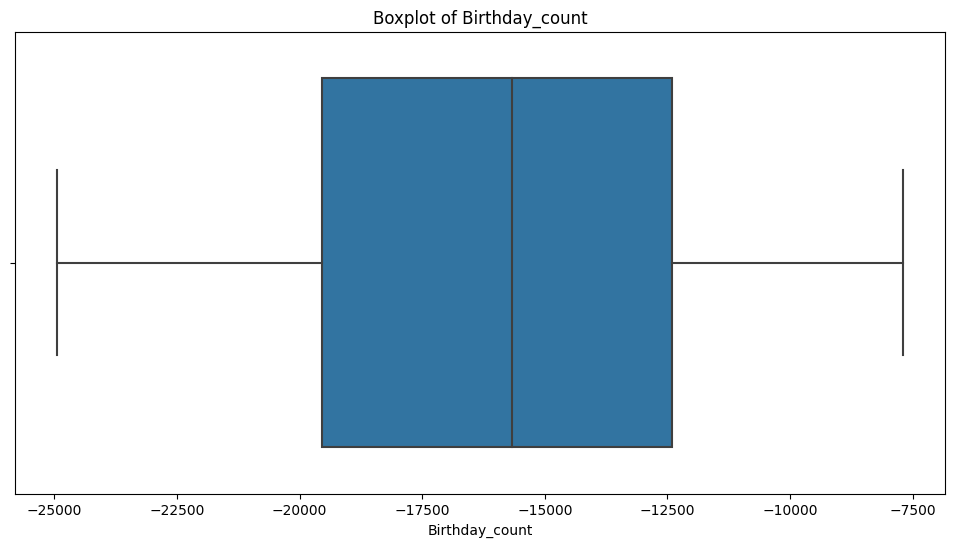

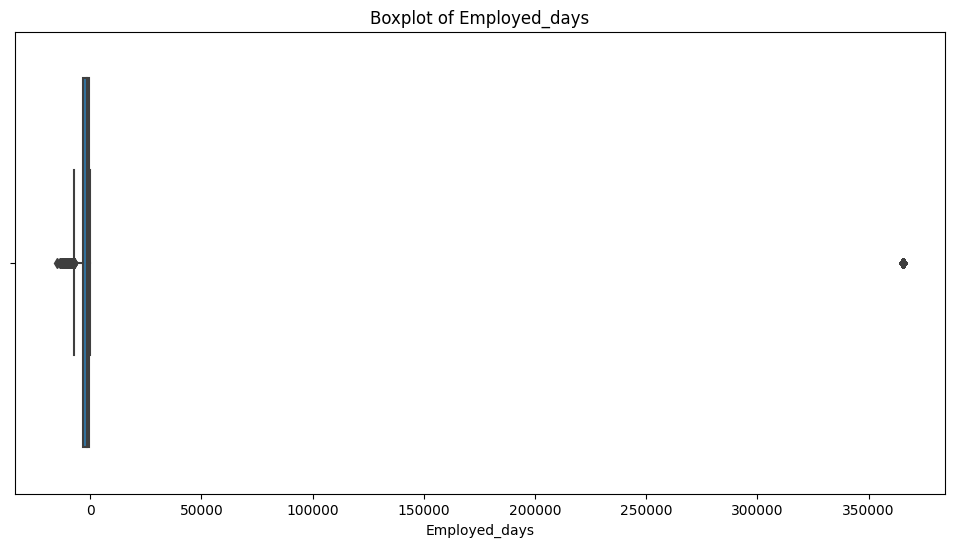

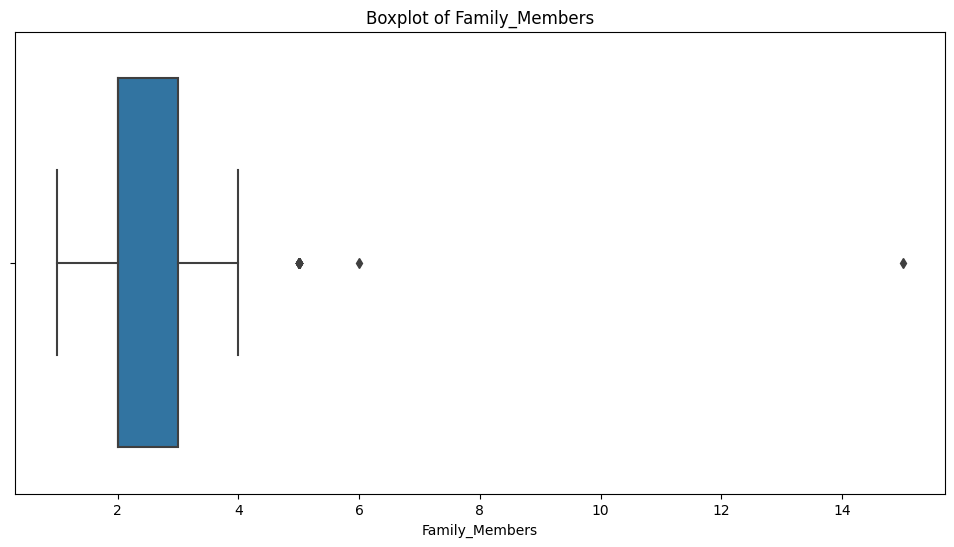

In [54]:
# Check the shape of the data after removing outliers
print(data.shape)

# Optionally, visualize the features again to confirm the outlier removal
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=feature)
    plt.title('Boxplot of ' + feature)
    plt.show()


In [55]:
import pandas as pd

# Define a function to remove extreme outliers
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example: Apply the function to each numerical feature
for feature in numerical_features:
    data = remove_extreme_outliers(data, feature)


(1092, 17)


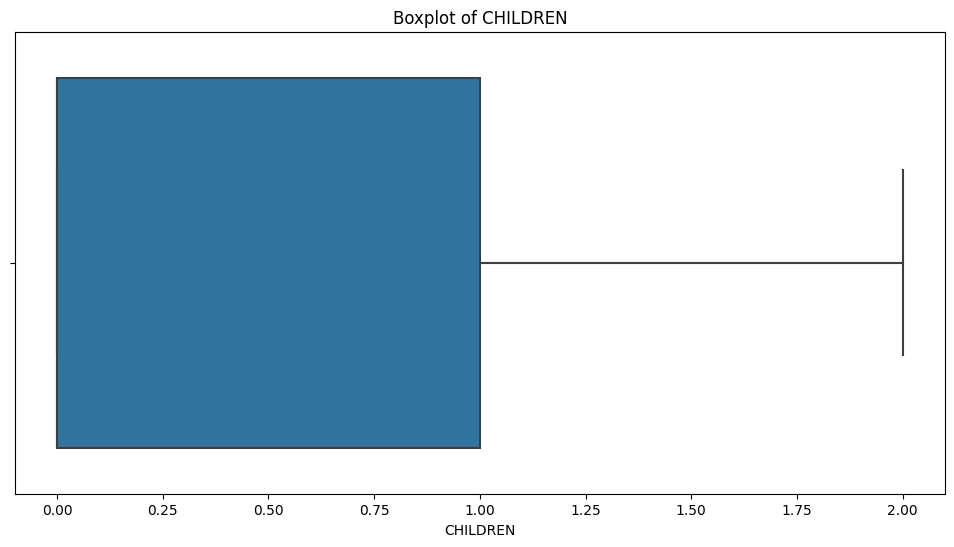

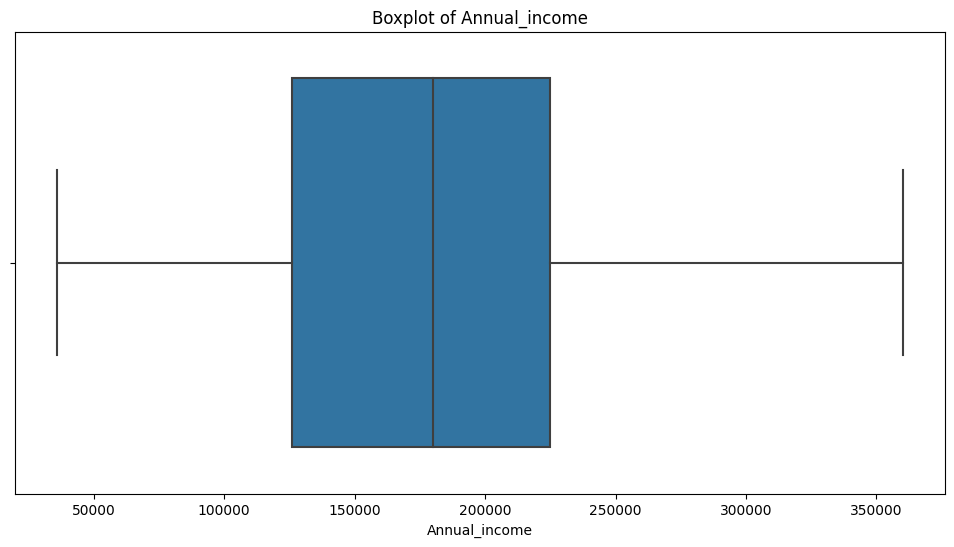

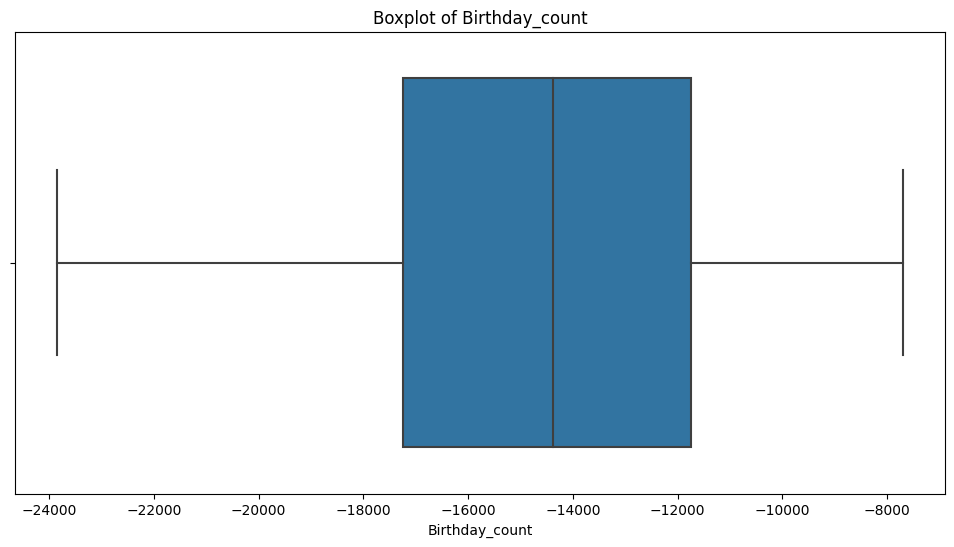

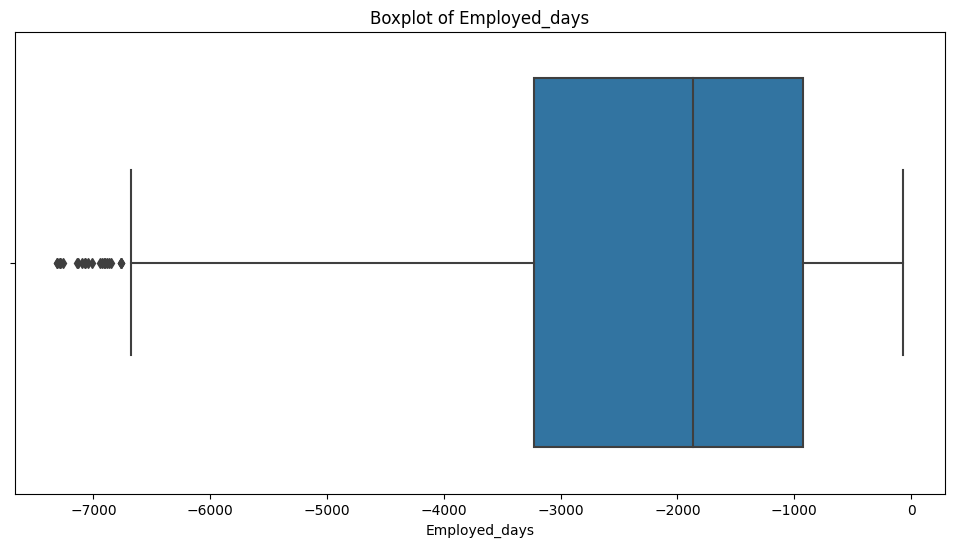

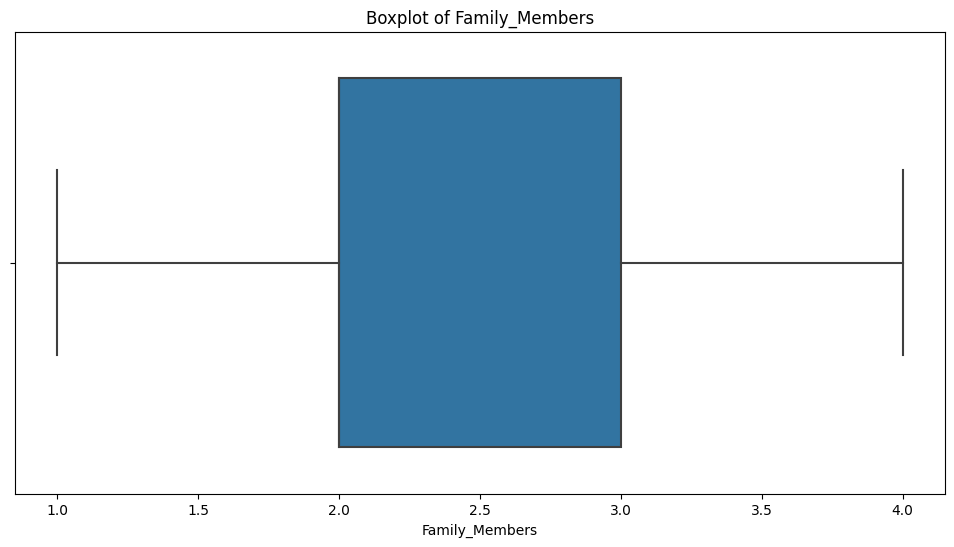

In [56]:
# Check the shape of the data after removing outliers
print(data.shape)

# Optionally, visualize the features again to confirm the outlier removal
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=feature)
    plt.title('Boxplot of ' + feature)
    plt.show()


In [58]:
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

In [60]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [62]:
# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

In [63]:
# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dense_transformer', dense_transformer)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 5: Oversampling
oversampler = TomekLinks()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Step 6: Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

 93%|█████████▎| 27/29 [00:04<00:00,  8.02it/s]

[LightGBM] [Info] Number of positive: 81, number of negative: 779
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 860, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094186 -> initscore=-2.263562
[LightGBM] [Info] Start training from score -2.263562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:05<00:00,  5.42it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.91               0.70     0.70      0.90   
RandomForestClassifier             0.92               0.69     0.69      0.90   
ExtraTreesClassifier               0.91               0.69     0.69      0.90   
XGBClassifier                      0.91               0.68     0.68      0.89   
ExtraTreeClassifier                0.83               0.68     0.68      0.84   
DecisionTreeClassifier             0.85               0.68     0.68      0.85   
BaggingClassifier                  0.90               0.67     0.67      0.89   
LabelPropagation                   0.87               0.63     0.63      0.86   
LabelSpreading                     0.87               0.63     0.63      0.86   
SGDClassifier                      0.86               0.56     0.56      0.83   
RidgeClassifierCV           

# Coba 2

In [65]:
data = data_copy.copy()

In [68]:
# make a copy data
data_copy = data.copy()

In [66]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,0,0,0,NaN,2,1
1,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
2,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
4,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,0,0,0,Managers,2,0
1544,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,0,0,0,Accountants,1,0
1545,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,0,0,0,Managers,4,0
1546,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,0,Drivers,2,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GENDER             1541 non-null   object  
 1   Car_Owner          1548 non-null   object  
 2   Propert_Owner      1548 non-null   object  
 3   CHILDREN           1548 non-null   int64   
 4   Annual_income      1525 non-null   float64 
 5   Type_Income        1548 non-null   object  
 6   EDUCATION          1548 non-null   object  
 7   Marital_status     1548 non-null   object  
 8   Housing_type       1548 non-null   object  
 9   Birthday_count     1526 non-null   float64 
 10  Employed_days      1548 non-null   int64   
 11  Work_Phone         1548 non-null   category
 12  Phone              1548 non-null   category
 13  EMAIL_ID           1548 non-null   category
 14  Type_Occupation    1060 non-null   object  
 15  Family_Members     1548 non-null   int64   
 16  label 

In [70]:
# Assuming the threshold is 36500 days
threshold = 350000

# Create the binary categorical variable
data['Employed_Category'] = data['Employed_days'].apply(lambda x: 'Regular' if x < threshold else 'Extreme')

In [72]:
data['Employed_Category'] = data['Employed_Category'].astype('category')

In [73]:
# Delete the original Employed_days variable
data = data.drop('Employed_days', axis=1)

In [74]:
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

In [76]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [77]:
# Function to convert sparse matrix to dense
dense_transformer = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

In [78]:
# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dense_transformer', dense_transformer)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 5: Oversampling
oversampler = TomekLinks()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Step 6: Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

 93%|█████████▎| 27/29 [00:04<00:00,  8.76it/s]

[LightGBM] [Info] Number of positive: 145, number of negative: 1076
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 1221, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118755 -> initscore=-2.004272
[LightGBM] [Info] Start training from score -2.004272


100%|██████████| 29/29 [00:05<00:00,  5.57it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.88               0.73     0.73      0.89   
ExtraTreesClassifier               0.92               0.69     0.69      0.91   
BaggingClassifier                  0.93               0.68     0.68      0.92   
RandomForestClassifier             0.94               0.67     0.67      0.92   
LGBMClassifier                     0.93               0.66     0.66      0.91   
ExtraTreeClassifier                0.87               0.66     0.66      0.88   
LabelPropagation                   0.89               0.65     0.65      0.88   
LabelSpreading                     0.89               0.65     0.65      0.88   
XGBClassifier                      0.93               0.65     0.65      0.91   
SGDClassifier                      0.78               0.58     0.58      0.81   
NearestCentroid             

# Coba 3

In [84]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 5: Oversampling
oversampler = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, silent=True)
}

# Fit each model and print classification report
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


RandomForest Accuracy: 0.9323
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       275
           1       0.82      0.51      0.63        35

    accuracy                           0.93       310
   macro avg       0.88      0.75      0.80       310
weighted avg       0.93      0.93      0.93       310

------------------------------------------------------------
Bagging Accuracy: 0.9032
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       275
           1       0.59      0.49      0.53        35

    accuracy                           0.90       310
   macro avg       0.76      0.72      0.74       310
weighted avg       0.90      0.90      0.90       310

------------------------------------------------------------
ExtraTrees Accuracy: 0.9290
Classification Report for ExtraTrees:
              precision    r

In [85]:
from sklearn.ensemble import VotingClassifier

# Define the individual models
best_models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('LGBM', LGBMClassifier(random_state=42))
]

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=best_models, voting='soft')  # 'soft' voting averages probabilities

# Fit the Voting Classifier on the resampled training data
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 1090, number of negative: 1098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 2188, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498172 -> initscore=-0.007313
[LightGBM] [Info] Start training from score -0.007313
Voting Classifier Accuracy: 0.9258
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       275
           1       0.77      0.49      0.60        35

    accuracy                           0.93       310
   macro avg       0.86      0.73      0.78       310
weighted avg       0.92      0.93      0.92       310



In [86]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the individual models
base_models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('LGBM', LGBMClassifier(random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Fit the Stacking Classifier on the resampled training data
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = stacking_clf.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print("Classification Report for Stacking Classifier:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 1090, number of negative: 1098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 2188, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498172 -> initscore=-0.007313
[LightGBM] [Info] Start training from score -0.007313
[LightGBM] [Info] Number of positive: 872, number of negative: 878
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2016
[LightGBM] [Info] Number of data points in the train set: 1750, number of used features: 46
[LightGBM] [Info] [binary:

# Batas Suci

# Coba 4

In [10]:

# Apply transformations to training and validation data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names
# num_features = ['Annual_income', 'Age_in_days', 'Days_of_employment', 'Family_Members']
# cat_features = preprocessor.named_transformers_['OHE']['encoder'].get_feature_names_out().tolist()
# all_features = num_features + cat_features

# Convert to DataFrame
X_train_final = pd.DataFrame(X_train_processed)
X_test_final = pd.DataFrame(X_test_processed)

# Your final training, validation, and test data are now ready to be used
X_train_final.head()
X_test_final.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.951629,-0.082133,0.666815,-0.451624,1.869313,-0.450849,-0.762509,1.862579,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.531533,0.192553,-0.297181,-0.445727,-0.171436,-0.445573,0.019276,-0.628820,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.531533,0.310276,1.008886,-0.440459,-1.191811,-0.440296,1.553893,-0.628820,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.531533,-0.670747,-0.740974,2.205910,-0.171436,2.205910,-0.617734,-0.628820,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.531533,-0.082133,-1.227112,-0.453438,-0.171436,-0.453488,-0.183409,-0.628820,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0      0.938     0.982     0.959       275
           1      0.773     0.486     0.596        35

    accuracy                          0.926       310
   macro avg      0.855     0.734     0.778       310
weighted avg      0.919     0.926     0.918       310



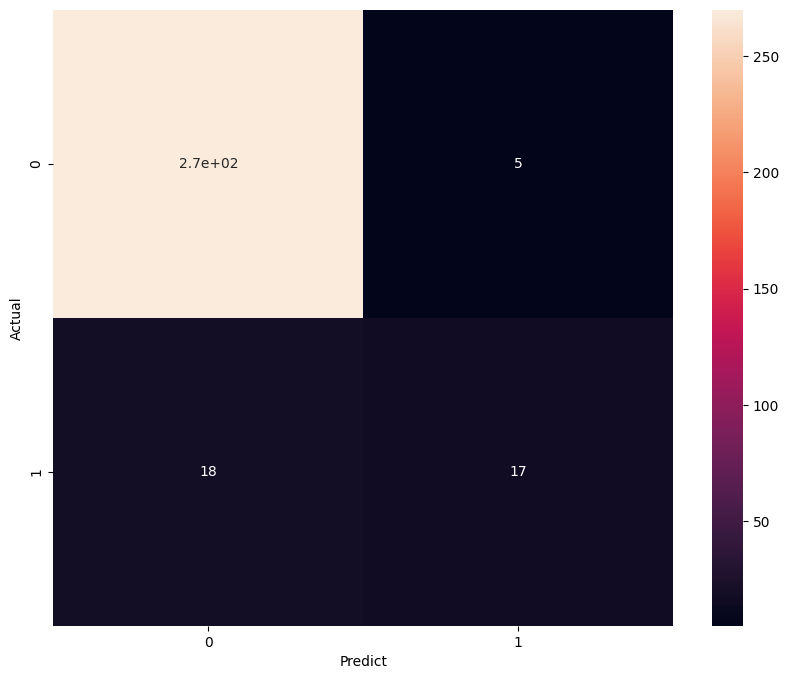

In [15]:
best = BalancedRandomForestClassifier(random_state=0, class_weight = 'balanced_subsample', verbose=0)
best.fit(X_train_resampled, y_train_resampled)
Y_pred = best.predict(X_test_final)

print(classification_report(y_test, Y_pred, digits=3))
# hapus marital status

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

Learning rate set to 0.014359
0:	learn: 0.6879669	total: 29.4ms	remaining: 29.4s
1:	learn: 0.6828849	total: 45.3ms	remaining: 22.6s
2:	learn: 0.6772115	total: 74.1ms	remaining: 24.6s
3:	learn: 0.6703376	total: 308ms	remaining: 1m 16s
4:	learn: 0.6649832	total: 456ms	remaining: 1m 30s
5:	learn: 0.6566581	total: 639ms	remaining: 1m 45s
6:	learn: 0.6540477	total: 685ms	remaining: 1m 37s
7:	learn: 0.6497286	total: 710ms	remaining: 1m 27s
8:	learn: 0.6469729	total: 759ms	remaining: 1m 23s
9:	learn: 0.6425786	total: 807ms	remaining: 1m 19s
10:	learn: 0.6388357	total: 879ms	remaining: 1m 19s
11:	learn: 0.6340004	total: 912ms	remaining: 1m 15s
12:	learn: 0.6290817	total: 954ms	remaining: 1m 12s
13:	learn: 0.6259214	total: 965ms	remaining: 1m 7s
14:	learn: 0.6237560	total: 977ms	remaining: 1m 4s
15:	learn: 0.6199858	total: 990ms	remaining: 1m
16:	learn: 0.6148498	total: 1s	remaining: 58s
17:	learn: 0.6107463	total: 1.02s	remaining: 55.5s
18:	learn: 0.6087534	total: 1.03s	remaining: 53s
19:	lear

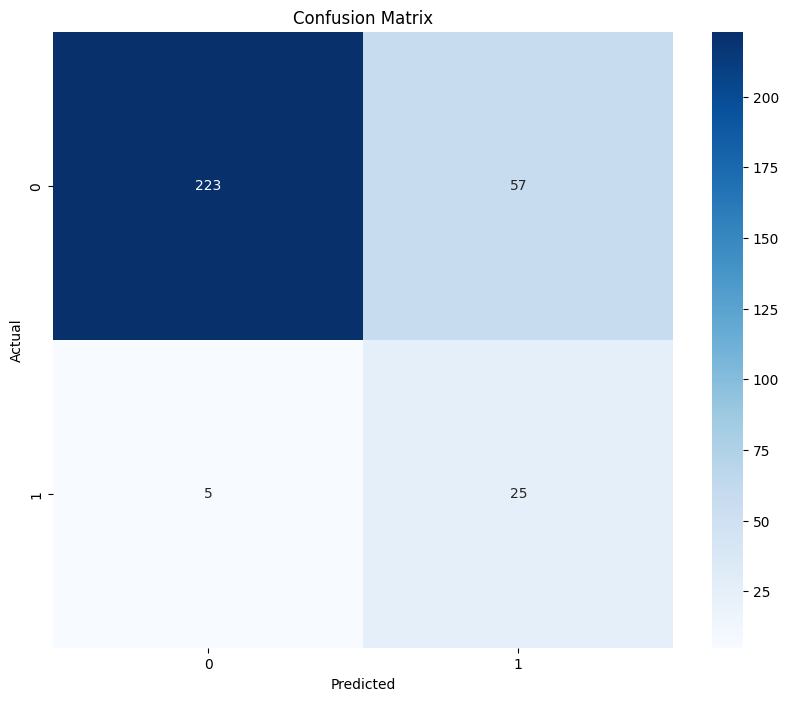

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop('label', axis=1)
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

# Define the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create and apply the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversample the training data using ADASYN
oversampler = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Train the Gradient Boosting model
model = CatBoostClassifier(random_state=0)
model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

# Calculate specificity (1 - FPR)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

# Find the threshold that gives the best geometric mean
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]

# Make predictions using the optimal threshold
y_pred = (y_probs >= optimal_threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_pred, digits=3))

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop('label', axis=1)
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

# Define the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create and apply the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversample the training data using ADASYN
oversampler = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test_processed)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

# Calculate specificity (1 - FPR)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

# Find the threshold that gives the best geometric mean
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]

# Make predictions using the optimal threshold
y_pred = (y_probs >= optimal_threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_pred, digits=3))

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
